In [7]:
import yfinance as yf

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [212]:
start = '2013-05-06'
end = '2023-05-01'

df = yf.download('META', start=start, end=end)

print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High    Low      Close  Adj Close    Volume
Date                                                                   
2013-05-06  28.330000  28.459999  27.48  27.570000  27.570000  43939400
2013-05-07  27.549999  27.850000  26.85  26.889999  26.889999  41259100
2013-05-08  26.879999  27.299999  26.65  27.120001  27.120001  34654900
2013-05-09  27.080000  27.549999  26.85  27.040001  27.040001  33457200
2013-05-10  27.139999  27.299999  26.57  26.680000  26.680000  30847100


In [214]:
df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-24  213.679993  213.919998  210.710007  212.789993  212.789993   
2023-04-25  210.820007  211.259995  207.130005  207.550003  207.550003   
2023-04-26  212.500000  214.110001  208.880005  209.399994  209.399994   
2023-04-27  239.889999  241.690002  236.770004  238.559998  238.559998   
2023-04-28  239.009995  240.429993  235.750000  240.320007  240.320007   

              Volume  
Date                  
2023-04-24  15750900  
2023-04-25  19198200  
2023-04-26  41992700  
2023-04-27  71196500  
2023-04-28  39554000

In [215]:
df = df.reset_index()
df.head()

Date       Open       High    Low      Close  Adj Close    Volume
0 2013-05-06  28.330000  28.459999  27.48  27.570000  27.570000  43939400
1 2013-05-07  27.549999  27.850000  26.85  26.889999  26.889999  41259100
2 2013-05-08  26.879999  27.299999  26.65  27.120001  27.120001  34654900
3 2013-05-09  27.080000  27.549999  26.85  27.040001  27.040001  33457200
4 2013-05-10  27.139999  27.299999  26.57  26.680000  26.680000  30847100

In [216]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

Open       High    Low      Close    Volume
0  28.330000  28.459999  27.48  27.570000  43939400
1  27.549999  27.850000  26.85  26.889999  41259100
2  26.879999  27.299999  26.65  27.120001  34654900
3  27.080000  27.549999  26.85  27.040001  33457200
4  27.139999  27.299999  26.57  26.680000  30847100

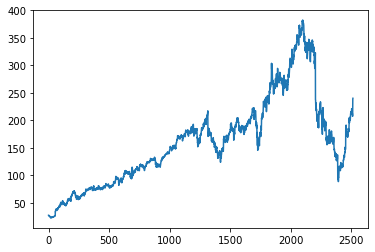

In [217]:
plt.plot(df.Close)

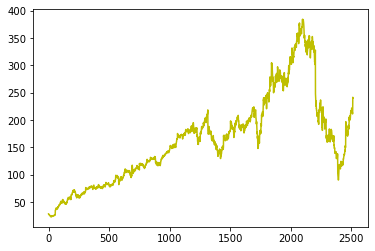

In [218]:
plt.plot(df.High, 'y')

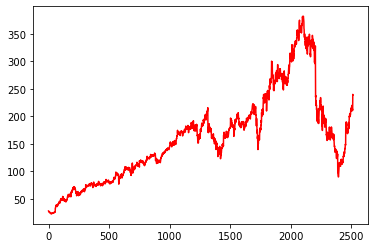

In [16]:
plt.plot(df.Open, 'r')

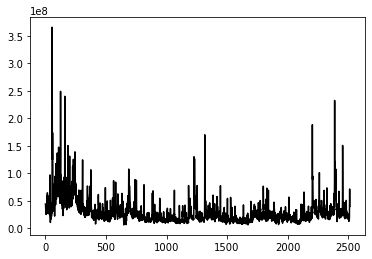

In [17]:
plt.plot(df.Volume, 'black')

In [18]:
df

Open        High         Low       Close    Volume
0      28.330000   28.459999   27.480000   27.570000  43939400
1      27.549999   27.850000   26.850000   26.889999  41259100
2      26.879999   27.299999   26.650000   27.120001  34654900
3      27.080000   27.549999   26.850000   27.040001  33457200
4      27.139999   27.299999   26.570000   26.680000  30847100
...          ...         ...         ...         ...       ...
2509  213.679993  213.919998  210.710007  212.789993  15750900
2510  210.820007  211.259995  207.130005  207.550003  19198200
2511  212.500000  214.110001  208.880005  209.399994  41992700
2512  239.889999  241.690002  236.770004  238.559998  71196500
2513  239.009995  240.429993  235.750000  240.320007  39554000

[2514 rows x 5 columns]

In [219]:
ma300 = df.Close.rolling(300).mean()
ma300

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2509    168.689234
2510    168.649234
2511    168.621567
2512    168.680100
2513    168.759367
Name: Close, Length: 2514, dtype: float64

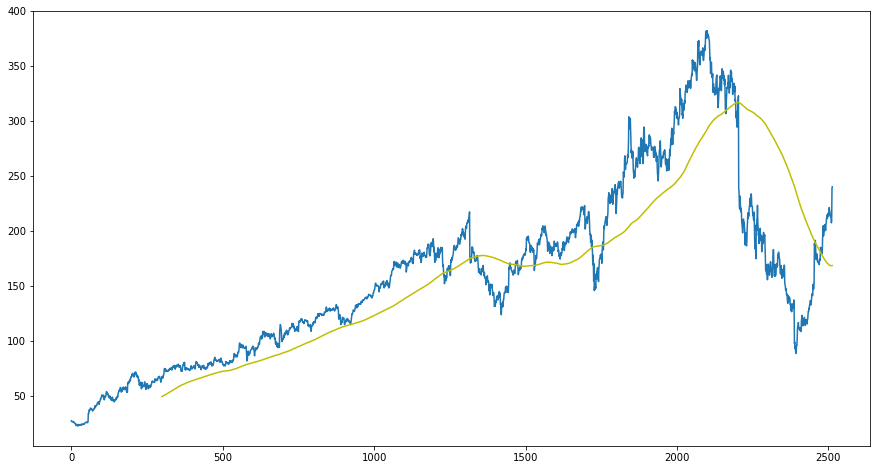

In [220]:
plt.figure(figsize = (15,8))
plt.plot(df.Close)
plt.plot(ma300, 'y')

In [221]:
ma500 = df.Close.rolling(500).mean()
ma500

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2509    235.43582
2510    235.19190
2511    234.96054
2512    234.79250
2513    234.63642
Name: Close, Length: 2514, dtype: float64

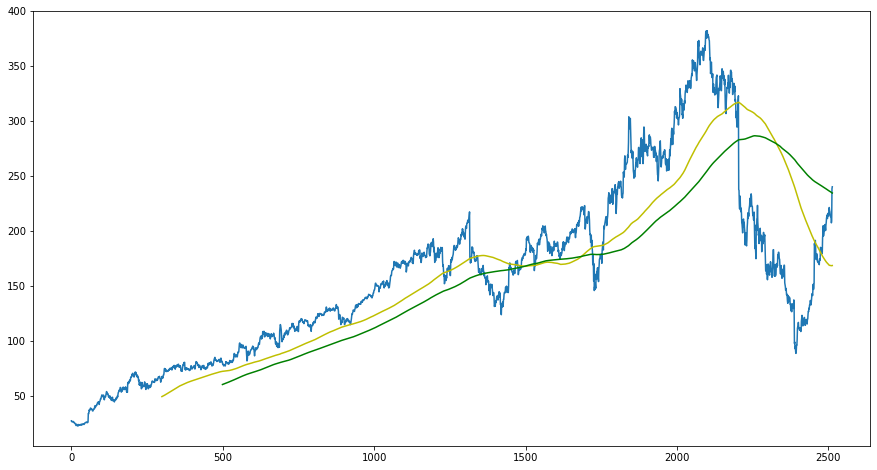

In [22]:
plt.figure(figsize = (15,8))
plt.plot(df.Close)
plt.plot(ma300, 'y')
plt.plot(ma500, 'g')

In [222]:
ma1000 = df.Close.rolling(1000).mean()
ma1000

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2509    230.99139
2510    231.00506
2511    231.02469
2512    231.07371
2513    231.12538
Name: Close, Length: 2514, dtype: float64

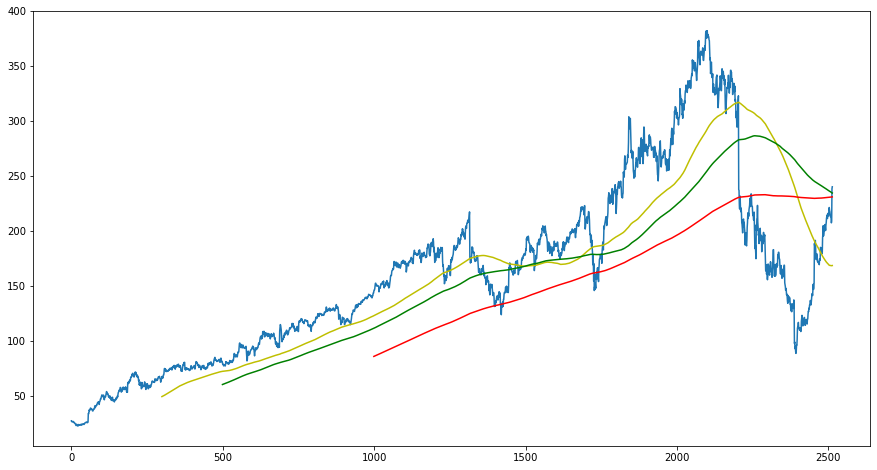

In [24]:
plt.figure(figsize = (15,8))
plt.plot(df.Close)
plt.plot(ma300, 'y')
plt.plot(ma500, 'g')
plt.plot(ma1000, 'r')

In [25]:
df.shape

(2514, 5)

In [25]:
## Splitting Data Into Training & Testing


In [223]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1759, 1)
(755, 1)


In [27]:
data_training.head()

Close
0  27.570000
1  26.889999
2  27.120001
3  27.040001
4  26.680000

In [28]:
data_testing.head()

Close
1759  204.710007
1760  202.270004
1761  205.259995
1762  207.070007
1763  208.470001

In [224]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [225]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02331154],
       [0.01991714],
       [0.02106525],
       ...,
       [0.8216443 ],
       [0.79873213],
       [0.85503922]])

In [226]:
data_training_array.shape


(1759, 1)

In [32]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [33]:
x_train.shape

(1659, 100, 1)

# LSTM MODEL

In [34]:
!pip install keras

In [35]:
!pip install Dropout

ERROR: Could not find a version that satisfies the requirement Dropout (from versions: none)
ERROR: No matching distribution found for Dropout


In [36]:
!pip install tensorflow
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [42]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [227]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [44]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 31s 384ms/step - loss: 0.0762
Epoch 2/50
52/52 [==============================] - 19s 366ms/step - loss: 0.0138
Epoch 3/50
52/52 [==============================] - 19s 364ms/step - loss: 0.0119
Epoch 4/50
52/52 [==============================] - 19s 367ms/step - loss: 0.0104
Epoch 5/50
52/52 [==============================] - 18s 344ms/step - loss: 0.0099
Epoch 6/50
52/52 [==============================] - 18s 349ms/step - loss: 0.0094
Epoch 7/50
52/52 [==============================] - 19s 360ms/step - loss: 0.0106
Epoch 8/50
52/52 [==============================] - 19s 362ms/step - loss: 0.0093
Epoch 9/50
52/52 [==============================] - 19s 367ms/step - loss: 0.0085
Epoch 10/50
52/52 [==============================] - 19s 368ms/step - loss: 0.0082
Epoch 11/50
52/52 [==============================] - 18s 347ms/step - loss: 0.0073
Epoch 12/50
52/52 [==============================] - 18s 348ms/step - loss: 0.0079
Epoch 13/50
5

In [45]:
model.save('keras_model1.h5')

In [115]:
data_testing.head()


Close
1759  204.710007
1760  202.270004
1761  205.259995
1762  207.070007
1763  208.470001

In [116]:
data_training.tail(100)

Close
1659  199.360001
1660  201.050003
1661  201.339996
1662  200.869995
1663  202.259995
...          ...
1754  185.130005
1755  190.070007
1756  187.500000
1757  182.910004
1758  194.190002

[100 rows x 1 columns]

In [228]:
past_100_days = data_training.tail(100)

In [229]:
final_df = past_100_days.append(data_testing, ignore_index= True)

In [230]:
final_df.head()

Close
0  199.360001
1  201.050003
2  201.339996
3  200.869995
4  202.259995

In [231]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.37661541],
       [0.38237803],
       [0.38336685],
       [0.38176423],
       [0.38650389],
       [0.36771576],
       [0.35871382],
       [0.37170525],
       [0.37330787],
       [0.38732226],
       [0.39946124],
       [0.40027962],
       [0.3998704 ],
       [0.396256  ],
       [0.40536023],
       [0.40641732],
       [0.39383505],
       [0.39669929],
       [0.4121458 ],
       [0.40836089],
       [0.42176154],
       [0.42333003],
       [0.43069527],
       [0.44119755],
       [0.44037917],
       [0.45350702],
       [0.443789  ],
       [0.45091552],
       [0.45302965],
       [0.45429127],
       [0.4519044 ],
       [0.45149524],
       [0.44617586],
       [0.43997001],
       [0.42950181],
       [0.4394585 ],
       [0.45800797],
       [0.41129335],
       [0.38531048],
       [0.39308488],
       [0.4123163 ],
       [0.41327105],
       [0.41579434],
       [0.42084087],
       [0.42333003],
       [0.40331436],
       [0.41548742],
       [0.423

In [232]:
input_data.shape

(855, 1)

In [233]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [234]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


# RandomForestRegressor

In [192]:
##model2
from sklearn.ensemble import RandomForestRegressor

In [237]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train.reshape(-1, 100), y_train)



RandomForestRegressor(random_state=42)

In [248]:
# Predict on training data
y_train_pred = rf_model.predict(x_train.reshape(-1, 100))


In [254]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [196]:
x_test_rf = x_test.reshape(-1, x_test.shape[1] * x_test.shape[2])
y_test_pred_rf = rf_model.predict(x_test_rf)

In [208]:
y_test_pred

array([0.39485801, 0.38653802, 0.39673337, ..., 0.40684621, 0.40932362,
       0.50609546])

In [209]:
y_test_pred.shape

(1510,)

In [210]:
# Retrieve the scaling factor from the scaler
scale_factor_rf =1/0.00340983

# Scale the predictions from the Random Forest model
y_test_pred_rf_scaled = y_test_pred_rf * scale_factor_rf
#y_test = y_test * scale_factor_rf

# Making Predictions

In [244]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 1s 48ms/step


In [245]:
y_predicted.shape

(755, 1)

In [203]:
y_test

[0.3948580058983102,
 0.3865380190847515,
 0.3967333692616686,
 0.40290520028832855,
 0.4076789376256976,
 0.4171923327586812,
 0.42090908400331284,
 0.423739194834145,
 0.41323697269193316,
 0.39618783644442257,
 0.4020186119043637,
 0.415896633784158,
 0.4237733264057343,
 0.43635559728117057,
 0.48099022348999276,
 0.4858321719407055,
 0.4978347784273067,
 0.4885941236880287,
 0.4781600606293258,
 0.4656119213254788,
 0.4643502498628753,
 0.48760529667880037,
 0.49036724842612356,
 0.4816380989921717,
 0.468442032156311,
 0.48371809569556135,
 0.4858662514824601,
 0.510655710154694,
 0.5040406369658864,
 0.46209975139104364,
 0.4762505656943782,
 0.48961708226884626,
 0.500358017292844,
 0.49994885467245087,
 0.5013468963319071,
 0.5110648727750872,
 0.5125311255478872,
 0.5228288184097373,
 0.49480003425644314,
 0.5004603079479423,
 0.433627725075602,
 0.449176529008558,
 0.47110174527837057,
 0.5068367202847989,
 0.492754117094808,
 0.5161455341075858,
 0.5181232401558772,
 0.5273

In [148]:
y_predicted

array([[100.65951 ],
       [101.785126],
       [102.86775 ],
       [103.918236],
       [104.95956 ],
       [106.00703 ],
       [107.09122 ],
       [108.21233 ],
       [109.355644],
       [110.50574 ],
       [111.67028 ],
       [112.81836 ],
       [113.91498 ],
       [114.954   ],
       [115.99105 ],
       [117.03554 ],
       [118.123146],
       [119.374626],
       [120.88026 ],
       [122.66646 ],
       [124.65737 ],
       [126.719734],
       [128.7882  ],
       [130.78813 ],
       [132.67657 ],
       [134.40918 ],
       [135.97203 ],
       [137.36336 ],
       [138.6164  ],
       [139.76425 ],
       [140.78665 ],
       [141.6766  ],
       [142.44086 ],
       [143.10532 ],
       [143.69713 ],
       [144.23991 ],
       [144.76187 ],
       [145.2872  ],
       [145.8431  ],
       [146.41061 ],
       [146.96594 ],
       [147.40648 ],
       [147.66414 ],
       [147.73067 ],
       [147.65967 ],
       [147.50346 ],
       [147.33252 ],
       [147.2

In [206]:
scaler.scale_

array([0.00340983])

In [251]:
scale_factor = 1/0.00340983
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

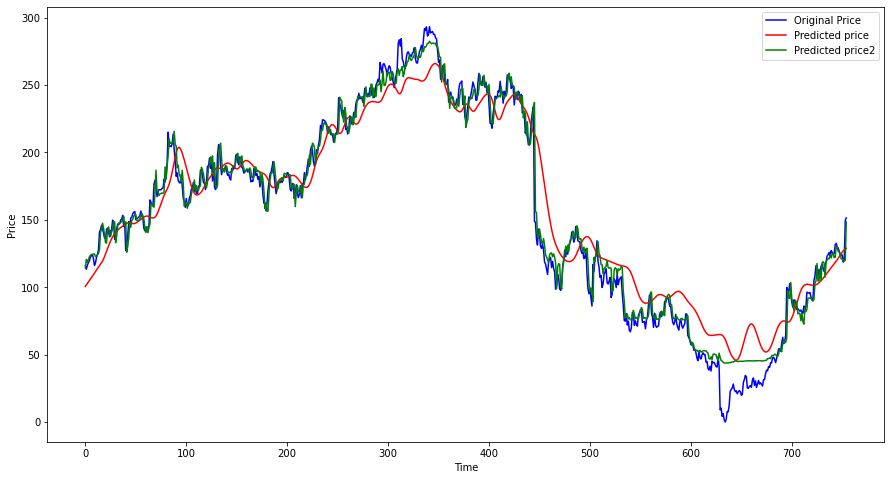

In [255]:
plt.figure(figsize=(15,8))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, "r", label="Predicted price by LSTM MODEL")
plt.plot(y_test_pred_rf_scaled, 'g', label = 'Predicted price by RANDOM FOREST')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [57]:
import os
print(os.getcwd())


C:\Users\ADMIN
